In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import  mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

# 读取分笔交易数据

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

print((tdr.get_available_symbols()))


('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


# 获取特定时间段的分笔交易数据

In [4]:
start = dt.datetime(2018,6,25)
stop = dt.datetime(2018,6,30)

td = tdr("EURUSD",start,stop)

print(td.get_data().head())

                            Bid      Ask
2018-06-24 21:00:12.290  1.1662  1.16660
2018-06-24 21:00:16.046  1.1662  1.16650
2018-06-24 21:00:22.846  1.1662  1.16658
2018-06-24 21:00:22.907  1.1662  1.16660
2018-06-24 21:00:23.441  1.1662  1.16663


# 画图

                             Bid      Ask
2018-06-29 12:00:00.011  1.16497  1.16498
2018-06-29 12:00:00.071  1.16497  1.16497
2018-06-29 12:00:00.079  1.16497  1.16498
2018-06-29 12:00:00.091  1.16495  1.16498
2018-06-29 12:00:00.205  1.16496  1.16498


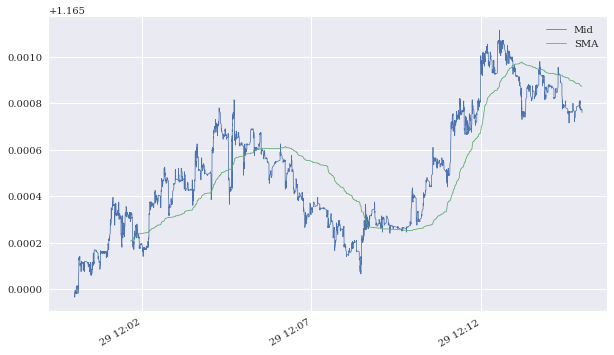

In [5]:
sub = td.get_data(start='2018-06-29 12:00:00',end='2018-06-29 12:15:00')
print(sub.head())
sub['Mid'] = sub.mean(axis=1)
sub['SMA'] = sub['Mid'].rolling(1000).mean()
sub[['Mid','SMA']].plot(figsize=(10,6), lw=0.75)

# 读取K线数据

In [6]:
from fxcmpy import fxcmpy_candles_data_reader as cdr
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


# 获取特定时间段的K线数据

In [7]:
start = dt.datetime(2018,5,1)
stop = dt.datetime(2018,6,30)

period = 'H1'

candles = cdr("EURUSD",start,stop,period)
data = candles.get_data()

print(data[data.columns].tail())

                     BidOpen  BidHigh   BidLow  BidClose  AskOpen  AskHigh  \
2018-06-29 16:00:00  1.16768  1.16820  1.16731   1.16769  1.16769  1.16820   
2018-06-29 17:00:00  1.16769  1.16826  1.16709   1.16781  1.16771  1.16827   
2018-06-29 18:00:00  1.16781  1.16816  1.16668   1.16684  1.16782  1.16817   
2018-06-29 19:00:00  1.16684  1.16792  1.16638   1.16774  1.16686  1.16794   
2018-06-29 20:00:00  1.16774  1.16904  1.16758   1.16816  1.16775  1.16907   

                      AskLow  AskClose  
2018-06-29 16:00:00  1.16732   1.16771  
2018-06-29 17:00:00  1.16711   1.16782  
2018-06-29 18:00:00  1.16669   1.16686  
2018-06-29 19:00:00  1.16640   1.16775  
2018-06-29 20:00:00  1.16760   1.16861  


# 画图

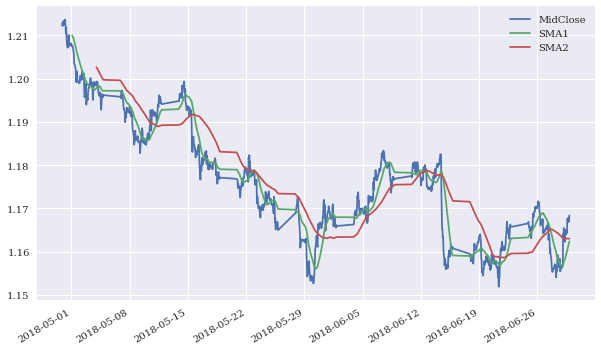

In [8]:
data['MidClose'] = data[['BidClose','AskClose']].mean(axis=1)
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()
data[['MidClose','SMA1','SMA2']].plot(figsize=(10,6))